# Descriptive statistics in python

---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
from scipy.stats import iqr

---
### Initialization

In [2]:
# Loading data
df_bank = pd.read_csv(f"../../../data/csv/bankdata.csv")
df_bank

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,48,FEMALE,INNER_CITY,17546.00,NO,1,NO,NO,NO,NO,YES
1,40,MALE,TOWN,30085.10,YES,3,YES,NO,YES,YES,NO
2,51,FEMALE,INNER_CITY,16575.40,YES,0,YES,YES,YES,NO,NO
3,23,FEMALE,TOWN,20375.40,YES,3,NO,NO,YES,NO,NO
4,57,FEMALE,RURAL,50576.30,YES,0,NO,YES,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...
595,61,FEMALE,INNER_CITY,47025.00,NO,2,YES,YES,YES,YES,NO
596,30,FEMALE,INNER_CITY,9672.25,YES,0,YES,YES,YES,NO,NO
597,31,FEMALE,TOWN,15976.30,YES,0,YES,YES,NO,NO,YES
598,29,MALE,INNER_CITY,14711.80,YES,0,NO,YES,NO,YES,NO


#### Dataframe details

In [3]:
df_bank.shape

(600, 11)

In [4]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          600 non-null    int64  
 1   sex          600 non-null    object 
 2   region       600 non-null    object 
 3   income       600 non-null    float64
 4   married      600 non-null    object 
 5   children     600 non-null    int64  
 6   car          600 non-null    object 
 7   save_act     600 non-null    object 
 8   current_act  600 non-null    object 
 9   mortgage     600 non-null    object 
 10  pep          600 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 51.7+ KB


In [5]:
df_bank.describe(include = 'all')

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
count,600.000000,600,600,600.000000,600,600.000000,600,600,600,600,600
unique,NaN,2,4,NaN,2,NaN,2,2,2,2,2
top,NaN,FEMALE,INNER_CITY,NaN,YES,NaN,NO,YES,YES,NO,NO
freq,NaN,300,269,NaN,396,NaN,304,414,455,391,326
mean,42.395000,NaN,NaN,27524.031217,NaN,1.011667,NaN,NaN,NaN,NaN,NaN
std,14.424947,NaN,NaN,12899.468246,NaN,1.056752,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,5014.210000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,30.000000,NaN,NaN,17264.500000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,42.000000,NaN,NaN,24925.300000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
75%,55.250000,NaN,NaN,36172.675000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN


In [6]:
df_bank.mode()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,40,FEMALE,INNER_CITY,38248.3,YES,0.0,NO,YES,YES,NO,NO
1,43,MALE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---
### Analysis and Visualization

#### Age analysis

In [7]:
df_bank['age'].describe()

count    600.000000
mean      42.395000
std       14.424947
min       18.000000
25%       30.000000
50%       42.000000
75%       55.250000
max       67.000000
Name: age, dtype: float64

Minimum age: 18, Maximum age: 67, Mode: [40 43 64]


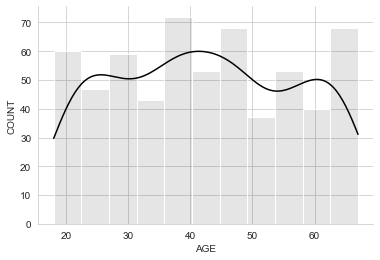

In [8]:
print(f"Minimum age: {df_bank['age'].min()}, Maximum age: {df_bank['age'].max()}, Mode: {df_bank['age'].mode().values}")

sns.set_style('whitegrid')

g = sns.histplot(
    data = df_bank,
    x = 'age',
    color = 'black',
    alpha = 0.1,
    kde = True,
    fill = True,

)

g.set_xlabel(g.get_xlabel().upper())
g.set_ylabel(g.get_ylabel().upper())

sns.despine(top = True, right = True)


25th percentile: 30.0, 50th percentile: 42.0, 75th percentile: 55.25
Interpretation: the quartile between 25th and 50th percentage has a smaller range


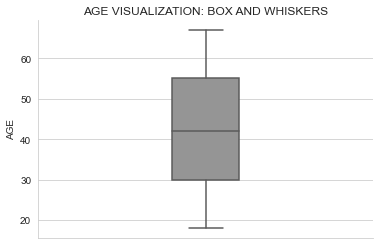

In [9]:
var_quantile1_age_df_bank = df_bank['age'].quantile(0.25)
var_quantile2_age_df_bank = df_bank['age'].quantile(0.5)
var_quantile3_age_df_bank = df_bank['age'].quantile(0.75)

print(f"25th percentile: {var_quantile1_age_df_bank}, 50th percentile: {var_quantile2_age_df_bank}, 75th percentile: {var_quantile3_age_df_bank}")
print(f"Interpretation: " + ("the quartile between 25th and 50th percentage has a smaller range" if ((var_quantile2_age_df_bank - var_quantile1_age_df_bank) < (var_quantile3_age_df_bank - var_quantile2_age_df_bank)) else "test" if ~((var_quantile2_age_df_bank - var_quantile1_age_df_bank) < (var_quantile3_age_df_bank - var_quantile2_age_df_bank)) else "quartiles between the median and both sides of the interquartile range are equal"))

sns.set_style('whitegrid')

g = sns.boxplot(
    data = df_bank,
    y = 'age',
    width = .2,
    palette = 'Greys'
)

sns.despine(top = True, right = True)
sns.set(rc = {'figure.figsize' : (8,5)})

g.set_ylabel(g.get_ylabel().upper());
g.set_title('AGE VISUALIZATION: BOX AND WHISKERS');


Age skewness: 0.03758885371092314
Interpretation: approximately symmetric


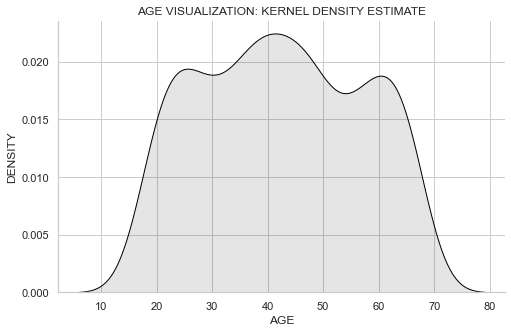

In [10]:
var_skew_age_df_bank = df_bank['age'].skew()
remarks_var_skew_age_df_bank = "highly positively skewed" if (var_skew_age_df_bank > 1) else "highly negatively skewed" if (var_skew_age_df_bank < -1) else "postively moderately skewed" if (var_skew_age_df_bank <= 1 and var_skew_age_df_bank >= 0.5) else "moderately negatively skewed" if (var_skew_age_df_bank >= -1 and var_skew_age_df_bank <= -0.5) else "approximately symmetric" if (var_skew_age_df_bank < 0.5 and var_skew_age_df_bank > -0.5) else ""

print(f"Age skewness: {var_skew_age_df_bank}")
print(f"Interpretation: {remarks_var_skew_age_df_bank}")

sns.set_style('whitegrid')

g = sns.kdeplot(
    data = df_bank,
    x = 'age',
    fill = True,
    alpha = 0.1,
    color = 'black',
)

g.set_title('AGE VISUALIZATION: KERNEL DENSITY ESTIMATE')
g.set_xlabel(g.get_xlabel().upper());
g.set_ylabel(g.get_ylabel().upper());

sns.set(rc = {'figure.figsize' : (8,5)})
sns.despine(top = True, right = True)

In [11]:
print(f"Age mean: {df_bank['age'].mean()}, Age variance: {df_bank['age'].var()}")
print("Interpretation: age values are spread out over a wider range")

Age mean: 42.395, Age variance: 208.07910684474112
Interpretation: age values are spread out over a wider range


#### Sex analysis

Female count: 300, Male count: 300


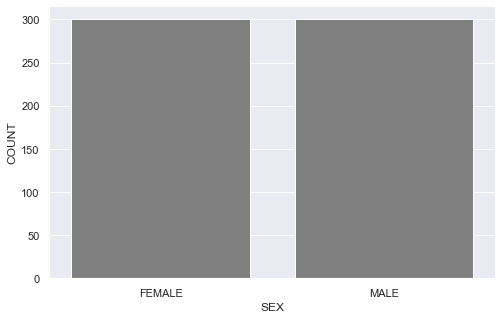

In [12]:
print(f"Female count: {df_bank.groupby('sex').get_group('FEMALE')['sex'].count()}, Male count: {df_bank.groupby('sex').get_group('MALE')['sex'].count()}")

g = sns.countplot(
    data = df_bank,
    x = 'sex',
    color = 'gray',
    alpha = 1,
)

sns.despine(top = True, right = True)

g.set_xlabel(g.get_xlabel().upper());
g.set_ylabel(g.get_ylabel().upper());

#### Region analysis

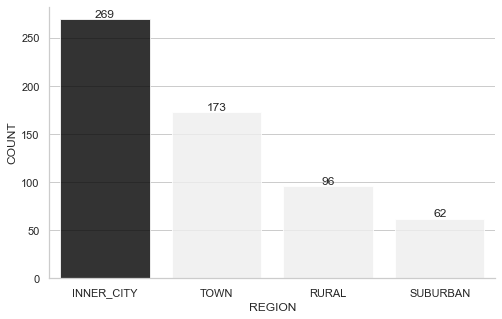

In [13]:
sns.set_style('whitegrid')

g = sns.countplot(
    data = df_bank,
    x = 'region',
    alpha = 0.8,
    palette = ['black' if x == df_bank['region'].value_counts().max() else '#eeeeee' for x in df_bank['region'].value_counts()]
)

g.set_xlabel(g.get_xlabel().upper())
g.set_ylabel(g.get_ylabel().upper())
g.bar_label(g.containers[0])

sns.despine()


#### Income analysis

In [14]:
df_bank['income'].describe()

count      600.000000
mean     27524.031217
std      12899.468246
min       5014.210000
25%      17264.500000
50%      24925.300000
75%      36172.675000
max      63130.100000
Name: income, dtype: float64

Minimum income: 5014.21, Maximum income: 63130.1, Mode: [38248.3]


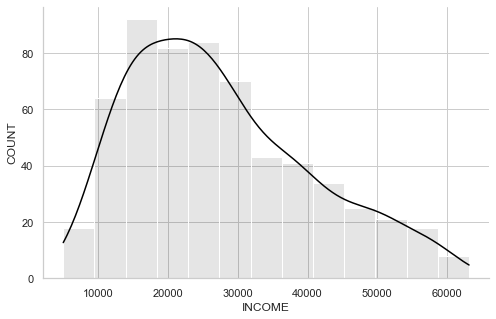

In [64]:
print(f"Minimum income: {df_bank['income'].min()}, Maximum income: {df_bank['income'].max()}, Mode: {df_bank['income'].mode().values}")

sns.set_style('whitegrid')

g = sns.histplot(
    data = df_bank,
    x = 'income',
    color = 'black',
    alpha = 0.1,
    kde = True,
    fill = True,
)

g.set_xlabel(g.get_xlabel().upper())
g.set_ylabel(g.get_ylabel().upper())

sns.despine(top = True, right = True)


25th percentile: 17264.5, 50th percentile: 24925.3, 75th percentile: 36172.674999999996
Interpretation: the quartile between 25th and 50th percentage has a smaller range


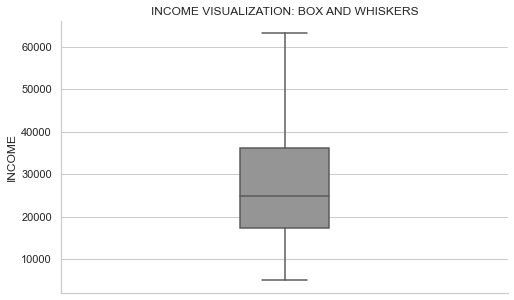

In [16]:
var_quantile1_income_df_bank = df_bank['income'].quantile(0.25)
var_quantile2_income_df_bank = df_bank['income'].quantile(0.5)
var_quantile3_income_df_bank = df_bank['income'].quantile(0.75)

print(f"25th percentile: {var_quantile1_income_df_bank}, 50th percentile: {var_quantile2_income_df_bank}, 75th percentile: {var_quantile3_income_df_bank}")
print(f"Interpretation: " + ("the quartile between 25th and 50th percentage has a smaller range" if ((var_quantile2_income_df_bank - var_quantile1_income_df_bank) < (var_quantile3_income_df_bank - var_quantile2_income_df_bank)) else "test" if ~((var_quantile2_income_df_bank - var_quantile1_income_df_bank) < (var_quantile3_income_df_bank - var_quantile2_income_df_bank)) else "quartiles between the median and both sides of the interquartile range are equal"))

sns.set_style('whitegrid')

g = sns.boxplot(
    data = df_bank,
    y = 'income',
    width = .2,
    palette = 'Greys'
)

sns.despine(top = True, right = True)
sns.set(rc = {'figure.figsize' : (8,5)})

g.set_ylabel(g.get_ylabel().upper());
g.set_title('INCOME VISUALIZATION: BOX AND WHISKERS');


income skewness: 0.6629166452179437
Interpretation: postively moderately skewed


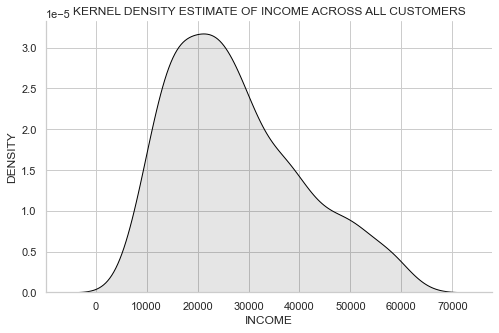

In [86]:
var_skew_income_df_bank = df_bank['income'].skew()
remarks_var_skew_income_df_bank = "highly positively skewed" if (var_skew_income_df_bank > 1) else "highly negatively skewed" if (var_skew_income_df_bank < -1) else "postively moderately skewed" if (var_skew_income_df_bank <= 1 and var_skew_income_df_bank >= 0.5) else "moderately negatively skewed" if (var_skew_income_df_bank >= -1 and var_skew_income_df_bank <= -0.5) else "approximately symmetric" if (var_skew_income_df_bank < 0.5 and var_skew_income_df_bank > -0.5) else ""

print(f"income skewness: {var_skew_income_df_bank}")
print(f"Interpretation: {remarks_var_skew_income_df_bank}")

sns.set_style('whitegrid')

g = sns.kdeplot(
    data = df_bank,
    x = 'income',
    fill = True,
    alpha = 0.1,
    color = 'black',
)

g.set_title('KERNEL DENSITY ESTIMATE OF INCOME ACROSS ALL CUSTOMERS');
g.set_xlabel(g.get_xlabel().upper());
g.set_ylabel(g.get_ylabel().upper());

sns.set(rc = {'figure.figsize' : (8,5)})
sns.despine(top = True, right = True)

In [18]:
print(f"Income mean: {df_bank['income'].mean()}, Income variance: {df_bank['income'].var()}")
print("Interpretation: income values are spread out over a wider range")

Income mean: 27524.0312166667, Income variance: 166396281.02003136
Interpretation: income values are spread out over a wider range


#### Marital status analysis

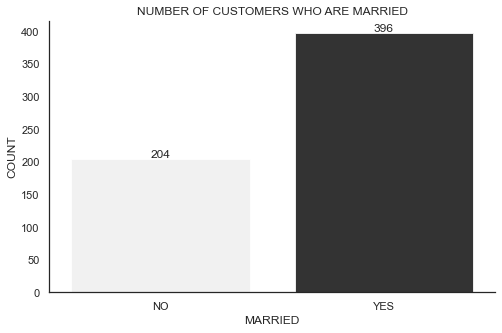

In [82]:
sns.set_style('white')

g = sns.countplot(
    data = df_bank,
    x = 'married',
    alpha = 0.8,
    palette = ['black' if x == df_bank['married'].value_counts().max() else '#eeeeee' for x in df_bank['married'].value_counts().sort_index(ascending = True)]
)

g.set_title('NUMBER OF CUSTOMERS WHO ARE MARRIED')
g.set_xlabel(g.get_xlabel().upper());
g.set_ylabel(g.get_ylabel().upper());
g.bar_label(g.containers[0])

sns.despine()

#### Children analysis

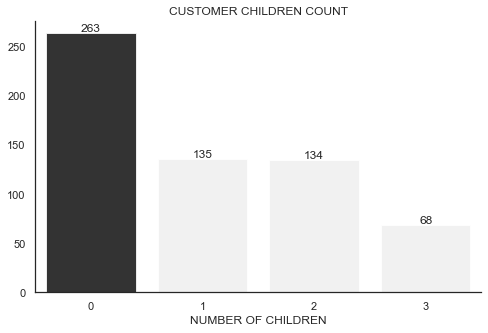

In [130]:
sns.set_style('white')

g = sns.countplot(
    data = df_bank,
    x = 'children',
    alpha = 0.8,
    palette = ['black' if x == df_bank['children'].value_counts().max() else '#eeeeee' for x in df_bank['children'].value_counts().sort_index(ascending = True)]
)

g.set_xlabel(f'NUMBER OF {g.get_xlabel().upper()}');
g.set_ylabel('');
g.set_title('CUSTOMER CHILDREN COUNT')
g.bar_label(g.containers[0])
sns.despine()

#### Car ownership analysis

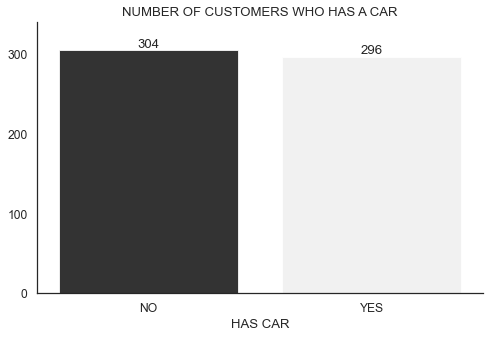

In [156]:
sns.set(
    style = 'white',
    font_scale = 1.1
)

g = sns.countplot(
    data = df_bank,
    x = 'car',
    alpha = 0.8,
    palette = ['black' if x == df_bank['car'].value_counts().max() else '#eeeeee' for x in df_bank['car'].value_counts().sort_index(ascending = True)]
)

g.set_xlabel(f'HAS {g.get_xlabel().upper()}')
g.set_ylabel('')
g.set_title('NUMBER OF CUSTOMERS WHO HAS A CAR')
g.bar_label(g.containers[0])

plt.yticks(
    ticks = [0,100,200,300, 340], 
    labels = ['0', '100', '200', '300','']
)

sns.despine()

#### Age, sex, and marriage analysis

In [19]:
df_bank['age'].describe()

count    600.000000
mean      42.395000
std       14.424947
min       18.000000
25%       30.000000
50%       42.000000
75%       55.250000
max       67.000000
Name: age, dtype: float64

In [20]:
# Male age statistics
df_bank.groupby('sex').get_group('MALE')['age'].describe()

count    300.000000
mean      41.096667
std       14.077924
min       18.000000
25%       29.000000
50%       40.000000
75%       52.000000
max       67.000000
Name: age, dtype: float64

In [21]:
# Female age statistics
df_bank.groupby('sex').get_group('FEMALE')['age'].describe()

count    300.000000
mean      43.693333
std       14.672545
min       18.000000
25%       31.000000
50%       44.000000
75%       57.000000
max       67.000000
Name: age, dtype: float64

FEMALE
Minimum age: 18, Maxmimum age: 67, Mode: [58]
MALE
Minimum age: 18, Maxmimum age: 67, Mode: [40]


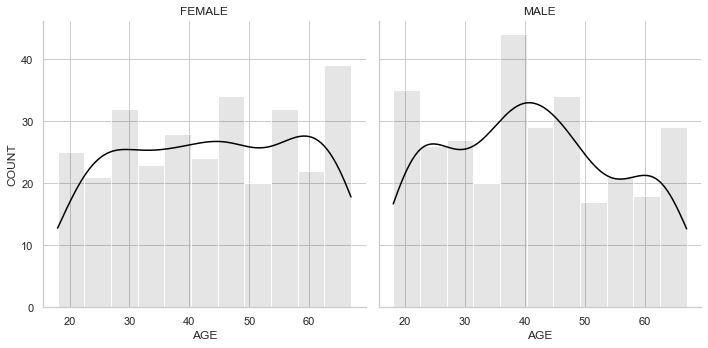

In [22]:
print("FEMALE")
print(f"Minimum age: {df_bank.groupby('sex').get_group('FEMALE')['age'].min()}, Maxmimum age: {df_bank.groupby('sex').get_group('FEMALE')['age'].max()}, Mode: {df_bank.groupby('sex').get_group('FEMALE')['age'].mode().values}")
print("MALE")
print(f"Minimum age: {df_bank.groupby('sex').get_group('MALE')['age'].min()}, Maxmimum age: {df_bank.groupby('sex').get_group('MALE')['age'].max()}, Mode: {df_bank.groupby('sex').get_group('MALE')['age'].mode().values}")

sns.set_style(style='whitegrid')

g = sns.displot(
    data = df_bank,
    x = 'age',
    col = 'sex',
    kind = 'hist',
    kde = True,
    alpha = 0.1,
    color = 'black',
)

g.set_titles(col_template = '{col_name}');
g.set_axis_labels(x_var='AGE', y_var='COUNT');


FEMALE
25th percentile: 31.0, 50th percentile: 44.0, 75th percentile: 57.0
Interpretation: the quartile between 50th and 75th percentage has a smaller range
MALE
25th percentile: 29.0, 50th percentile: 40.0, 75th percentile: 52.0
Interpretation: the quartile between 25th and 50th percentage has a smaller range


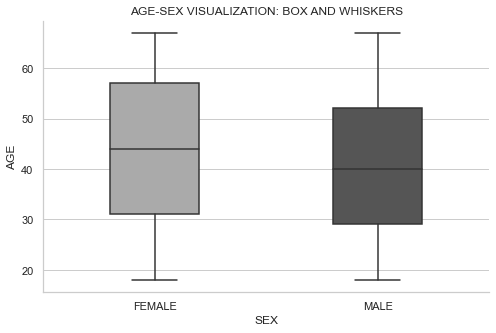

In [23]:
var_quantile1_age_female_df_bank = df_bank.groupby('sex').get_group('FEMALE')['age'].quantile(0.25)
var_quantile2_age_female_df_bank = df_bank.groupby('sex').get_group('FEMALE')['age'].quantile(0.5)
var_quantile3_age_female_df_bank = df_bank.groupby('sex').get_group('FEMALE')['age'].quantile(0.75)

print("FEMALE")
print(f"25th percentile: {var_quantile1_age_female_df_bank}, 50th percentile: {var_quantile2_age_female_df_bank}, 75th percentile: {var_quantile3_age_female_df_bank}")
print(f"Interpretation: " + ("the quartile between 25th and 50th percentage has a smaller range" if ((var_quantile2_age_female_df_bank - var_quantile1_age_female_df_bank) < (var_quantile3_age_female_df_bank - var_quantile2_age_female_df_bank)) else "the quartile between 50th and 75th percentage has a smaller range" if ~((var_quantile2_age_female_df_bank - var_quantile1_age_female_df_bank) < (var_quantile3_age_female_df_bank - var_quantile2_age_female_df_bank)) else "quartiles between the median and both sides of the interquartile range are equal"))

var_quantile1_age_male_df_bank = df_bank.groupby('sex').get_group('MALE')['age'].quantile(0.25)
var_quantile2_age_male_df_bank = df_bank.groupby('sex').get_group('MALE')['age'].quantile(0.5)
var_quantile3_age_male_df_bank = df_bank.groupby('sex').get_group('MALE')['age'].quantile(0.75)

print("MALE")
print(f"25th percentile: {var_quantile1_age_male_df_bank}, 50th percentile: {var_quantile2_age_male_df_bank}, 75th percentile: {var_quantile3_age_male_df_bank}")
print(f"Interpretation: " + ("the quartile between 25th and 50th percentage has a smaller range" if ((var_quantile2_age_male_df_bank - var_quantile1_age_male_df_bank) < (var_quantile3_age_male_df_bank - var_quantile2_age_male_df_bank)) else "the quartile between 50th and 75th percentage has a smaller range" if ~((var_quantile2_age_male_df_bank - var_quantile1_age_male_df_bank) < (var_quantile3_age_male_df_bank - var_quantile2_age_male_df_bank)) else "quartiles between the median and both sides of the interquartile range are equal"))

sns.set_style(style='whitegrid')

g = sns.boxplot(
    data = df_bank,
    y = 'age',
    x = 'sex',
    width = .4,
    palette = 'gray_r',
)

g.set_title('AGE-SEX VISUALIZATION: BOX AND WHISKERS')
g.set_xlabel(g.get_xlabel().upper());
g.set_ylabel(g.get_ylabel().upper());

sns.despine(top = True, right = True)


Female group age skewness: 0.11870557780098265 approximately symmetric
Male group age skewness: -0.054276974793079795 approximately symmetric


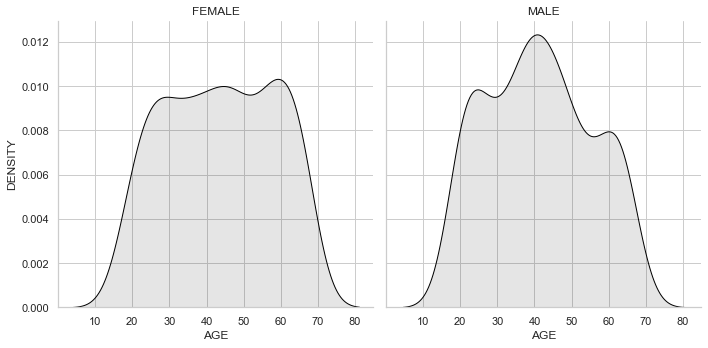

In [24]:
var_skew_male_age_df_bank = df_bank.groupby('sex').get_group('FEMALE')['age'].skew()
var_skew_female_age_df_bank = df_bank.groupby('sex').get_group('MALE')['age'].skew()

remarks_var_skew_female_age_df_bank = "highly positively skewed" if (var_skew_female_age_df_bank > 1) else "highly negatively skewed" if (var_skew_female_age_df_bank < -1) else "postively moderately skewed" if (var_skew_female_age_df_bank <= 1 and var_skew_female_age_df_bank >= 0.5) else "moderately negatively skewed" if (var_skew_female_age_df_bank >= -1 and var_skew_female_age_df_bank <= -0.5) else "approximately symmetric" if (var_skew_female_age_df_bank < 0.5 and var_skew_female_age_df_bank > -0.5) else "symmetrical"
remarks_var_skew_male_age_df_bank = "highly positively skewed" if (var_skew_male_age_df_bank > 1) else "highly negatively skewed" if (var_skew_male_age_df_bank < -1) else "postively moderately skewed" if (var_skew_male_age_df_bank <= 1 and var_skew_male_age_df_bank >= 0.5) else "moderately negatively skewed" if (var_skew_male_age_df_bank >= -1 and var_skew_male_age_df_bank <= -0.5) else "approximately symmetric" if (var_skew_male_age_df_bank < 0.5 and var_skew_male_age_df_bank > -0.5) else "symmetrical"

print(f"Female group age skewness: {var_skew_female_age_df_bank} {remarks_var_skew_female_age_df_bank}")
print(f"Male group age skewness: {var_skew_male_age_df_bank} {remarks_var_skew_male_age_df_bank}")

sns.set_style(style='whitegrid')

g = sns.displot(
    data = df_bank,
    x = 'age',
    col = 'sex',
    kind = 'kde',
    fill = True,
    alpha = 0.1,
    color = 'black',    
)

g.set_titles(col_template = '{col_name}');
g.set_axis_labels(x_var='AGE', y_var='DENSITY');



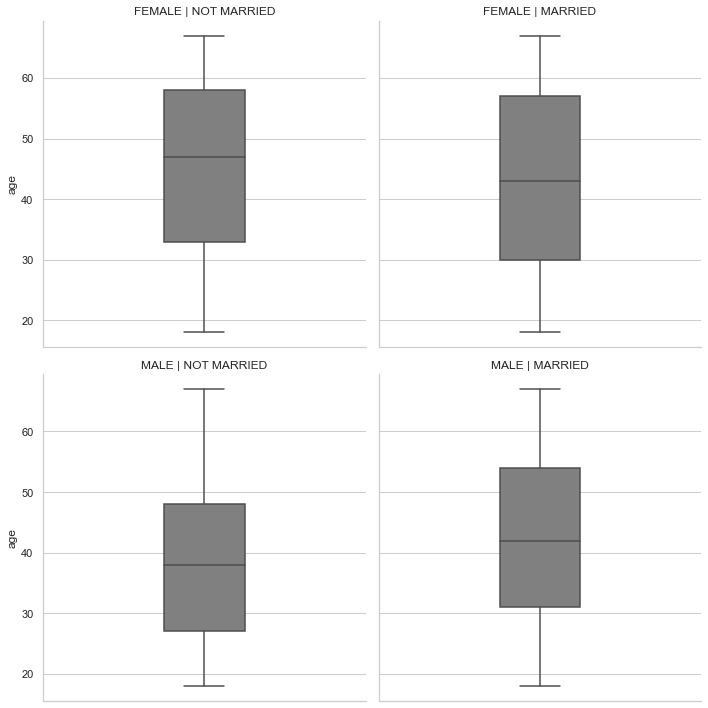

In [402]:
g = sns.catplot(
    data = df_bank,
    row = 'sex',
    col = 'married',
    y = 'age',
    kind = 'box',
    width = 0.25,
    color = 'gray',
)

rep_val = {
    'NO' : 'Not Married',
    'YES' : 'Married'
}

g.col_names = [rep_val.get(x).upper() for x in g.col_names]

g.set_titles(row_template = '{row_name}', col_template = '{col_name}')

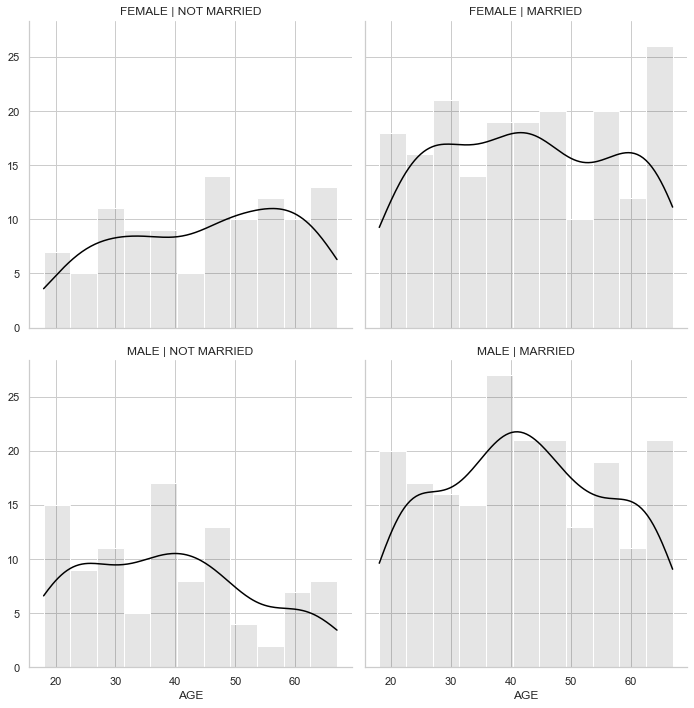

In [368]:
sns.set(style = 'whitegrid')

g = sns.displot(
    data = df_bank,
    col = 'married',
    row = 'sex',
    x = 'age',
    kde = True,
    color = 'black',
    alpha = 0.1
)

rep_val = {
    'Not Married' : 'NO',
    'Married' : 'YES',
}
rep_val = {v:k for k,v in rep_val.items()}

g.col_names = [rep_val.get(x).upper() for x in g.col_names]
g.set_titles(col_template = '{col_name}', row_template = '{row_name}')
g.set_xlabels(g.axes[1,0].get_xlabel().upper())
g.set_ylabels('')
